In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
CCprofiler_R1_10min = pd.read_csv('R1_10min_prot.csv')
CCprofiler_R1_30min = pd.read_csv('R1_30min_prot.csv')
CCprofiler_R2_10min = pd.read_csv('R2_10min_prot.csv')
CCprofiler_R2_30min = pd.read_csv('R2_30min_prot.csv')
CCprofiler_R3_10min = pd.read_csv('R3_10min_prot.csv')
CCprofiler_R3_30min = pd.read_csv('R3_30min_prot.csv')
SPADE_R1_10min= pd.read_csv('SPADE_smointensity_R1_10.csv')
SPADE_R2_10min= pd.read_csv('SPADE_smointensity_R2_10.csv')
SPADE_R3_10min= pd.read_csv('SPADE_smointensity_R3_10.csv')
SPADE_R1_30min= pd.read_csv('SPADE_smointensity_R1_30.csv')
SPADE_R2_30min= pd.read_csv('SPADE_smointensity_R2_30.csv')
SPADE_R3_30min= pd.read_csv('SPADE_smointensity_R3_10.csv')



In [4]:
datasets = {
    ("SPADE", "10minR1"): SPADE_R1_10min,
    ("SPADE", "10minR2"): SPADE_R2_10min,
    ("SPADE", "10minR3"): SPADE_R3_10min,
    ("SPADE", "30minR1"): SPADE_R1_30min,
    ("SPADE", "30minR2"): SPADE_R2_30min,
    ("SPADE", "30minR3"): SPADE_R3_30min,
    ("CCprofiler", "10minR1"): CCprofiler_R1_10min,
    ("CCprofiler", "10minR2"): CCprofiler_R2_10min,
    ("CCprofiler", "10minR3"): CCprofiler_R3_10min,
    ("CCprofiler", "30minR1"): CCprofiler_R1_30min,
    ("CCprofiler", "30minR2"): CCprofiler_R2_30min,
    ("CCprofiler", "30minR3"): CCprofiler_R3_30min,
}

df = pd.concat(datasets, axis=1)

In [5]:
shared_proteins = pd.read_csv('multiplicity_difference_SPADEvsCCprofiler.csv')


In [10]:

mask =shared_proteins['protein_id'].tolist
df_filtered= df.loc[:, (slice(None), '10minR1', ['protein_id','fraction','intensity'])]

In [7]:
mask

<bound method IndexOpsMixin.tolist of 0       A0A087WQ44
1       A0A0B4J1G0
2       A0A0G2JG52
3       A0A140LIF8
4       A0A1L1SSC7
           ...    
3839        Q9Z2X2
3840        Q9Z2X8
3841        Q9Z2Y3
3842        Q9Z315
3843        S4R1W5
Name: protein_id, Length: 3844, dtype: object>

In [12]:
#df_filtered

df_long = df_filtered.stack(level=[0, 1])
# Rename the index levels for clarity
df_long.index.names = ['original_index', 'group', 'time']
df_long = df_long.reset_index()
df_long

C:\Users\jca21\AppData\Local\Temp\ipykernel_30332\3805630142.py:3: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_long = df_filtered.stack(level=[0, 1])


,original_index,group,time,protein_id,fraction,intensity
0,0,CCprofiler,10minR1,Q9Z329,1.0,21208000.0
1,0,SPADE,10minR1,A1L314,1.0,1822232.0
2,1,CCprofiler,10minR1,Q9Z2Q5,1.0,135923.0
3,1,SPADE,10minR1,A1L3P4,1.0,57200.0
4,2,CCprofiler,10minR1,Q9Z2N8,1.0,75744.5
...,...,...,...,...,...,...
186462,104631,SPADE,10minR1,Q9Z2A0,40.0,1215940.0
186463,104632,SPADE,10minR1,Q9Z2E1,40.0,3163910.0
186464,104633,SPADE,10minR1,Q9Z2I9,40.0,1033040.0
186465,104634,SPADE,10minR1,Q9Z2R6,40.0,5572590.0


In [13]:
mask =shared_proteins['protein_id'].tolist()
commonpeaks = df_long[df_long['protein_id'].isin(mask)]

In [28]:
test1 = commonpeaks[commonpeaks['protein_id'] == 'A0A0B4J1G0']
test1

,original_index,group,time,protein_id,fraction,intensity
1521,760,SPADE,10minR1,A0A0B4J1G0,2.0,1.312590e+07
7196,3598,CCprofiler,10minR1,A0A0B4J1G0,10.0,1.543060e+07
7299,3649,SPADE,10minR1,A0A0B4J1G0,3.0,2.477878e+07
12526,6263,CCprofiler,10minR1,A0A0B4J1G0,11.0,3.503490e+07
13307,6653,SPADE,10minR1,A0A0B4J1G0,4.0,3.153127e+07
17180,8590,CCprofiler,10minR1,A0A0B4J1G0,12.0,5.813200e+06
19441,9720,SPADE,10minR1,A0A0B4J1G0,5.0,3.555230e+07
21724,10862,CCprofiler,10minR1,A0A0B4J1G0,13.0,1.979421e+07
25647,12823,SPADE,10minR1,A0A0B4J1G0,6.0,3.739702e+07
26272,13136,CCprofiler,10minR1,A0A0B4J1G0,14.0,4.770260e+06


C:\Users\jca21\AppData\Local\Temp\ipykernel_30332\352310193.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Protein and Method', bbox_to_anchor=(1.05, 1), loc='upper left')


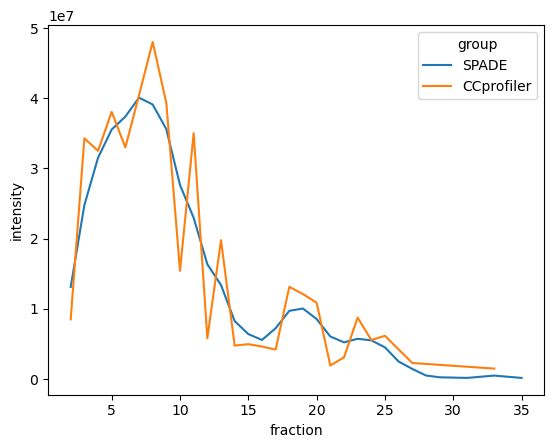

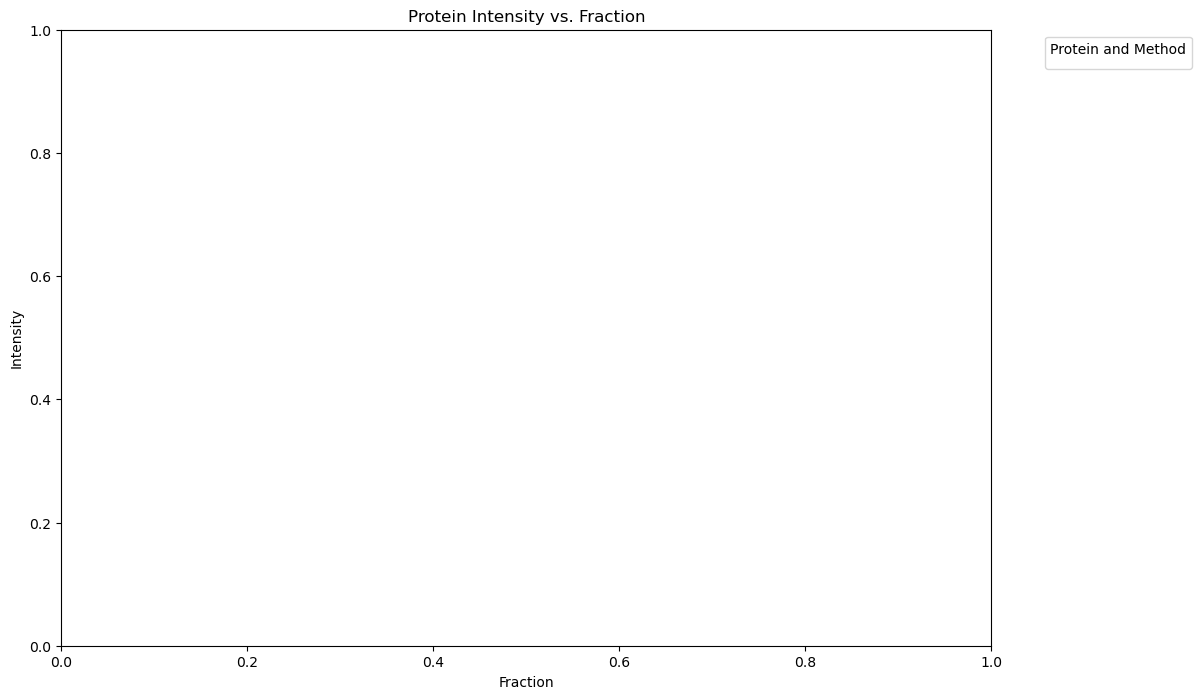

In [29]:
# 3. Create the line plot
#plt.plot(test1['fraction'], test1['intensity'], marker='o', label='protein_id')
sns.lineplot(data = test1, x = 'fraction' , y = 'intensity', hue = 'group')
plt.figure(figsize=(12, 8))
plt.title("Protein Intensity vs. Fraction")
plt.xlabel("Fraction")
plt.ylabel("Intensity")
plt.legend(title='Protein and Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()